# BinWaves example in Cantabria (Propagation)

**In this notebook**: 
<br><br>
Here is where the construction of the library of pre-run cases for all the monochromatic wave systems is made.
<br><br>
Steps:
- Generates wave conditions for all given frequencies and directions.
- Generates SWAN cases and runs them.
- Extracts SWAN cases and saves output.
- Plots the library for all the cases and some larger example ones.

## Create SWAN cases

In [1]:
from bluemath_tk.wrappers.swan.swan_example import (
    example_directions,
    example_frequencies,
)
from bluemath_tk.waves.binwaves import generate_swan_cases

# Generate swan model parameters

swan_cases_df = (
    generate_swan_cases(
        directions_array=example_directions,
        frequencies_array=example_frequencies,
    )
    .astype(float)
    .to_dataframe()
    .reset_index()
)
swan_cases_df.to_csv("outputs/swan_cases.csv", index=False)
model_parameters = swan_cases_df.to_dict(orient="list")

swan_cases_df

,dir,freq,hs,tp,spr,gamma
0,262.5,0.035000,1.0,28.5714,2.0,50.0
1,262.5,0.038500,1.0,25.9740,2.0,50.0
2,262.5,0.042350,1.0,23.6128,2.0,50.0
3,262.5,0.046585,1.0,21.4661,2.0,50.0
4,262.5,0.051243,1.0,19.5147,2.0,50.0
...,...,...,...,...,...,...
691,277.5,0.344744,0.1,2.9007,2.0,50.0
692,277.5,0.379219,0.1,2.6370,2.0,50.0
693,277.5,0.417136,0.1,2.3973,2.0,50.0
694,277.5,0.458842,0.1,2.1794,2.0,50.0


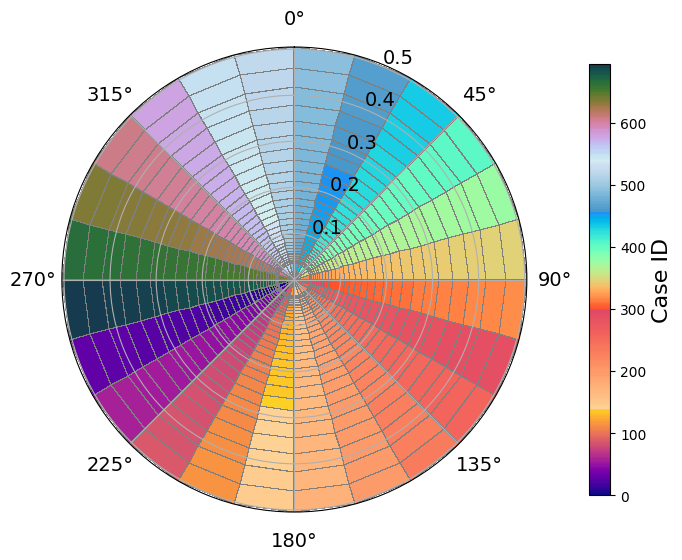

In [2]:
import numpy as np
from bluemath_tk.waves.binwaves import plot_selected_cases_grid

# Plot the cases grid

plot_selected_cases_grid(
    frequencies=np.array(example_frequencies),
    directions=np.array(example_directions),
    figsize=(8, 8),
)

## Build and run SWAN cases

In [3]:
import os
from bluemath_tk.wrappers.swan.swan_example import BinWavesWrapper

# Define the input templates and output directory for the wrapper

templates_dir = os.path.join(os.getcwd(), "templates")
templates_name = ["INPUT", "depth.dat", "buoys.loc"]
output_dir = os.path.join(os.getcwd(), "CAN_cases")

# Create an instance of the SWAN model wrapper

swan_wrapper = BinWavesWrapper(
    templates_dir=templates_dir,
    templates_name=templates_name,
    model_parameters=model_parameters,
    output_dir=output_dir,
)

2025-03-12 08:03:36,193 - BinWavesWrapper - WARNING - Setting self.num_workers to 1. Change it using self.set_num_processors_to_use method.
2025-03-12 08:03:36,194 - BinWavesWrapper - INFO - Parameter dir has the correct type: <class 'float'>
2025-03-12 08:03:36,195 - BinWavesWrapper - WARNING - Parameter freq is not in the default_parameters
2025-03-12 08:03:36,196 - BinWavesWrapper - INFO - Parameter hs has the correct type: <class 'float'>
2025-03-12 08:03:36,197 - BinWavesWrapper - INFO - Parameter tp has the correct type: <class 'float'>
2025-03-12 08:03:36,197 - BinWavesWrapper - INFO - Parameter spr has the correct type: <class 'float'>
2025-03-12 08:03:36,198 - BinWavesWrapper - WARNING - Parameter gamma is not in the default_parameters


In [ ]:
# Build the input files

swan_wrapper.build_cases(mode="one_by_one")

# Set the cases directories from the output directory
# Execute if the cases are already built

# swan_wrapper.set_cases_dirs_from_output_dir()

2025-03-12 08:04:18,998 - BinWavesWrapper - INFO - 696 cases created in one_by_one mode and saved in /workspaces/BlueMath_notebooks/hybrid_downscaling/additive/BinWaves/CAN_cases
2025-03-12 08:04:38,485 - BinWavesWrapper - WARNING - Cases directories already set... resetting.
2025-03-12 08:04:38,486 - BinWavesWrapper - INFO - Cases directories set from /workspaces/BlueMath_notebooks/hybrid_downscaling/additive/BinWaves/CAN_cases.


In [22]:
# Select cases to run
cases_to_run = [2, 8]

In [23]:
# Plot cases to run parameters

swan_cases_df.iloc[cases_to_run]

,dir,freq,hs,tp,spr,gamma
2,262.5,0.042350,1.0,23.6128,2.0,50.0
8,262.5,0.075026,1.0,13.3288,2.0,50.0


In [ ]:
# Run the model

swan_wrapper.run_cases_in_background(launcher="swan_serial.exe", cases_to_run=cases_to_run, num_workers=2)

2025-03-12 08:05:29,459 - BinWavesWrapper - WARNING - Cases to run was specified, so just [2, 8] will be run.
2025-03-12 08:05:29,460 - BinWavesWrapper - INFO - Using ThreadPoolExecutor for parallel execution
2025-03-12 08:05:29,462 - BinWavesWrapper - INFO - Running case in /workspaces/BlueMath_notebooks/hybrid_downscaling/additive/BinWaves/CAN_cases/0002 with launcher=swan_serial.exe.
2025-03-12 08:05:29,462 - BinWavesWrapper - INFO - Running case in /workspaces/BlueMath_notebooks/hybrid_downscaling/additive/BinWaves/CAN_cases/0008 with launcher=swan_serial.exe.


2025-03-12 08:05:31,878 - BinWavesWrapper - ERROR - Error running command: swan_serial.exe
2025-03-12 08:05:31,879 - BinWavesWrapper - ERROR - Error: Command 'swan_serial.exe' returned non-zero exit status 1.
2025-03-12 08:13:55,678 - BinWavesWrapper - INFO - All cases executed.


In [24]:
# Monitor running cases

swan_wrapper.monitor_cases().iloc[cases_to_run]

,Case,Percentage
2,0002,0 %
8,0008,99.79 %


In [20]:
# Post-process the output files

cases_bulk_parameters = swan_wrapper.postprocess_cases(cases_to_postprocess=[8], write_output_nc=False)
cases_bulk_parameters

2025-03-12 08:14:53,549 - BinWavesWrapper - WARNING - Output postprocessed file already exists. Skipping postprocessing.


<xarray.Dataset> Size: 3MB
Dimensions:   (case_num: 1, Yp: 355, Xp: 699)
Coordinates:
  * Xp        (Xp) float32 3kB 4.1e+05 4.101e+05 4.102e+05 ... 4.799e+05 4.8e+05
  * Yp        (Yp) float32 1kB 4.802e+06 4.802e+06 ... 4.838e+06 4.838e+06
  * case_num  (case_num) int64 8B 8
Data variables:
    Hsig      (case_num, Yp, Xp) float32 993kB ...
    Tm02      (case_num, Yp, Xp) float32 993kB ...
    Dir       (case_num, Yp, Xp) float32 993kB ...

/opt/conda/lib/python3.12/site-packages/bluemath_tk/core/operations.py:342: RuntimeWarning: invalid value encountered in multiply
  x_rad = x_deg * np.pi / 180
/opt/conda/lib/python3.12/site-packages/matplotlib/colors.py:2294: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin


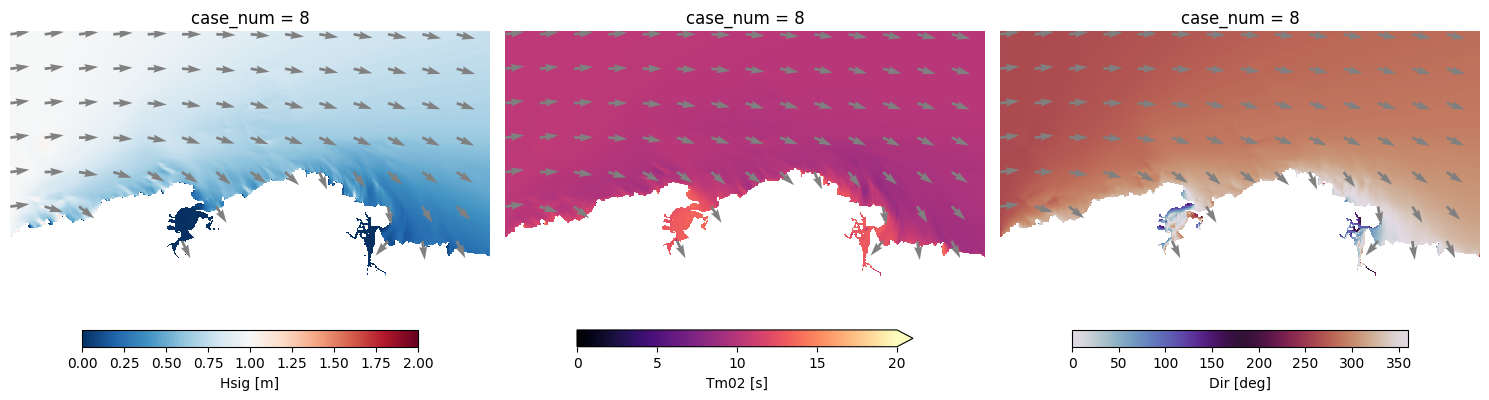

In [21]:
from utils.plotting import plot_case_variables

plot_case_variables(
    data=cases_bulk_parameters.isel(case_num=0),
)

In [25]:
import xarray as xr
from utils.plotting import plot_cases_grid

all_cases_bulk_parameters = xr.open_dataset(
    "https://geoocean.sci.unican.es/thredds/dodsC/geoceanData/GEOOCEAN/BinWavesCourse/cases_bulk_parameters_32bits.nc"
)

plot_cases_grid(
    data=all_cases_bulk_parameters.Hsig.where(
        all_cases_bulk_parameters.case_num.isin(
            swan_cases_df.where(swan_cases_df["hs"] == 1.0).dropna().index.values
        ),
        all_cases_bulk_parameters.Hsig * 10,
    ),
)

RuntimeError: NetCDF: Authorization failure